In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load datasets
from sklearn.datasets import make_blobs
# blobs
data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)
# normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]   

In [2]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
# set number of nodes in each layer
num_inputs = 3  # 3 dimensional input
num_hidden = 2  # 2 dimensional representation 
num_outputs = num_inputs # Must be true for an autoencoder!
X = tf.placeholder(tf.float32, shape=[None, num_inputs])
hidden = fully_connected(X, num_hidden, activation_fn=None)
outputs = fully_connected(hidden, num_outputs, activation_fn=None)
learning_rate = 0.01
loss = tf.reduce_mean(tf.square(outputs - X))  # MSE
# optimizer = tf.train.AdamOptimizer(learning_rate)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train  = optimizer.minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
saver = tf.train.Saver()

INFO:tensorflow:Restoring parameters from ../models/m3-2-3/m3-2-3.ckpt


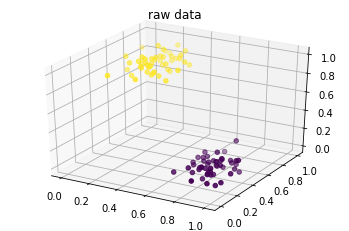

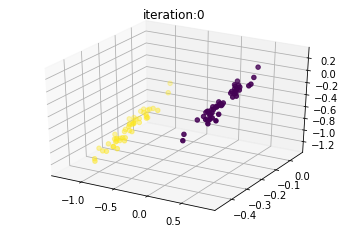

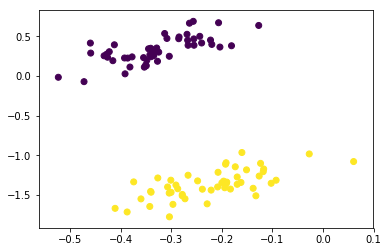

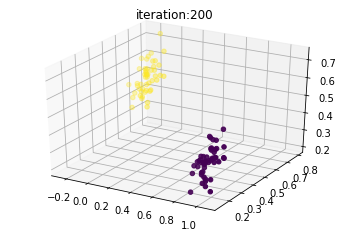

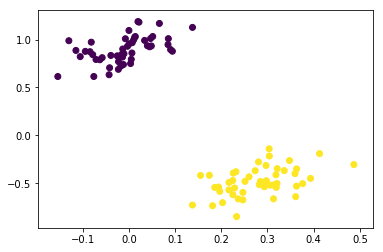

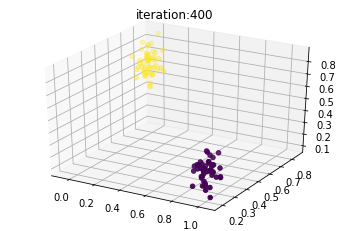

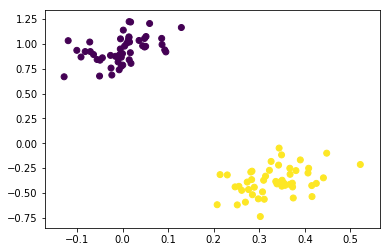

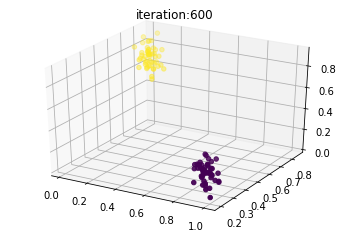

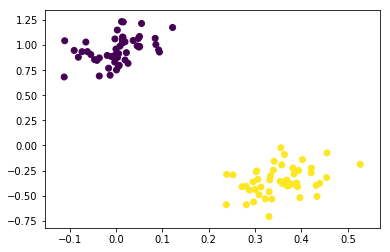

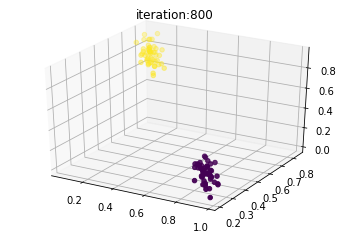

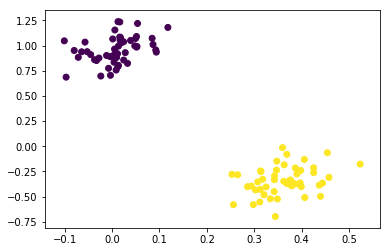

In [5]:
num_steps = 1000
per = 200
sess = tf.Session()
plot2d = True
# plot2d = False

plot3d = True
# plot3d = False
# with tf.Session() as sess:
# sess.run(init)
saver.restore(sess,"../models/m3-2-3/m3-2-3.ckpt")

# plot data in 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1]) 
plt.title("raw data")
for iteration in range(num_steps):
    sess.run(train,feed_dict={X: scaled_data})
    output_2d = hidden.eval(feed_dict={X: scaled_data},session=sess)
    output_3d = outputs.eval(feed_dict={X: scaled_data},session=sess)
    if (iteration % per == 0):      
        if plot3d:
            fig = plt.figure()
            ax = fig.add_subplot(111,projection='3d')
            ax.scatter(output_3d[:,0],output_3d[:,1],output_3d[:,2],c=data[1])    
            plt.title("iteration:"+str(iteration))  
        if plot2d:
            fig = plt.figure()
            plt.scatter(output_2d[:,0],output_2d[:,1],c=data[1])          
sess.close()